# Exponential Smoothing of Data

https://en.wikipedia.org/wiki/Exponential_smoothing provides a really easy to implement smoothing technique that works well for eliminating noise at frequencies much higher than the frequency of changes in the actual signal.

Define a time constant that represents a short time in your measurements, but a long time for your sources of noise and your sample rate. If you are sampling at about 1000 times a second you might choose a tenth of a second as your time constant. That would be 100000 microseconds.

Tau = 100000 

then calculate a weighting for the new sample based on how long it has been since the last sample:

w = min( (t-lastT)/Tau, 1.0 )  

The shorter the time step, the less weight will go the new measurement and the more on the accumulate history in the smoothed estimate Ts when calculating an updated version of the estimate:

Ts = (1-w)*Ts + w*T  

This is easy to implement in high level languages like python and matlab, but more important, it is really easy to implement in real time when we are working in the limited memory environment of our microcontrollers.



This code applies the exponential smoothing to a time series that has already been collected, going through and updating the smoothed estimate at each time step through the series. Check the Arduino resources to find arduino code that does the same thing in real time.

In [2]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

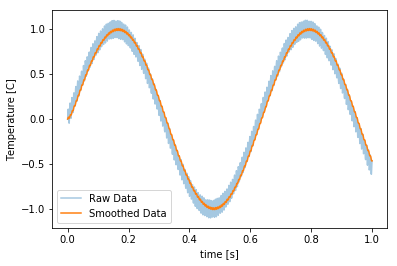

In [3]:
tau = .01                  # time constant
t = np.linspace(0,1,1000)  # time of measurement
# Simulate a low frequency signal with added high frequency noise 
T = np.sin(10*t) + np.sin(1000*t)/10
Ts = T.copy()              # another vector for the smoothed data
for i in range(1,len(Ts)): # here's where the actual smoothing happens
    dt = t[i]-t[i-1]
    w = min(dt/tau,1)
    Ts[i] = Ts[i-1] * (1-w) + T[i] * w
plot(t,T, alpha = 0.4, label = 'Raw Data')
plot(t,Ts, label = 'Smoothed Data')
xlabel('time [s]')
ylabel('Temperature [C]')
legend()

Now put the smoothing in a function you can call from anywhere. The section starting with "def" defines the function but doesn't do anything yet. The code below calls the function to make some calculations.

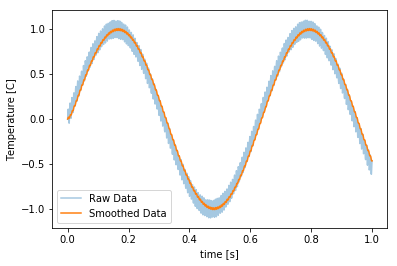

In [4]:
def expSmooth(t,T,tau):        # returns a smoothed version of T with time constant tau
    Ts = T.copy()              # another vector for the smoothed data
    for i in range(1,len(Ts)): # here's where the actual smoothing happens
        dt = t[i]-t[i-1]
        w = min(dt/tau,1)
        Ts[i] = Ts[i-1] * (1-w) + T[i] * w
    return Ts                  # return the smoothed data

    
tau = .01                  # time constant
t = np.linspace(0,1,1000)  # time of measurement
# Simulate a low frequency signal with added high frequency noise 
T = np.sin(10*t) + np.sin(1000*t)/10
T2 = expSmooth(t,T,tau)
plot(t,T, alpha = 0.4, label = 'Raw Data')
plot(t,T2, label = 'Smoothed Data')
xlabel('time [s]')
ylabel('Temperature [C]')
legend()